In [14]:
import pandas as pd
import afinn
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import matplotlib.pyplot as plt

## Data preparation

In [3]:
spark = SparkSession.builder.appName("data").getOrCreate()

24/05/13 21:31:15 WARN Utils: Your hostname, alber-victus resolves to a loopback address: 127.0.1.1; using 192.168.1.25 instead (on interface wlp4s0)
24/05/13 21:31:15 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/13 21:31:15 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [9]:
schema = StructType([

    StructField('date',StringType(),True),
    StructField('afinn_sentiment',FloatType(),True),
    StructField('pnn_sentiment',FloatType(),True),
    StructField('price_percent_change',FloatType(),True),
    StructField('volume_percent_change',FloatType(),True),
    StructField('next_day_price_percent_change_shifted',FloatType(),True)
    
])

In [12]:
df = spark.read.schema(schema).option("header","true").csv("../data/csv/Apple/")

In [13]:
df.show()

+----------+---------------+-------------+--------------------+---------------------+-------------------------------------+
|      date|afinn_sentiment|pnn_sentiment|price_percent_change|volume_percent_change|next_day_price_percent_change_shifted|
+----------+---------------+-------------+--------------------+---------------------+-------------------------------------+
|2017-01-05|      1.2822199|   0.94871795|          0.50856656|            5.0927877|                            1.1147993|
|2017-01-06|      0.9775525|   0.85714287|           1.1147993|             43.06782|                            0.9159431|
|2017-01-09|      1.2078797|    0.8636364|           0.9159431|             5.700446|                          0.100866936|
|2017-01-10|      1.3345554|          1.0|         0.100866936|           -27.113483|                            0.5373229|
|2017-01-11|      1.1759468|    0.8367347|           0.5373229|            12.780996|                          -0.41753826|
|2017-01

24/05/13 21:38:06 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: 2017-01-04, 0.8635359, 0.8787878787878788, -0.11191723, -26.627151, 0.50856656
 Schema: date, afinn_sentiment, pnn_sentiment, price_percent_change, volume_percent_change, next_day_price_percent_change_shifted
Expected: date but found: 2017-01-04
CSV file: file:///home/alber/Desktop/SJSU_Spring_2024/BigData/stock-market-PySpark/data/csv/Apple/part-00000-6aac7173-ccb5-4be8-9f64-e07dcc57e4a7-c000.csv


TypeError: 'Column' object is not callable

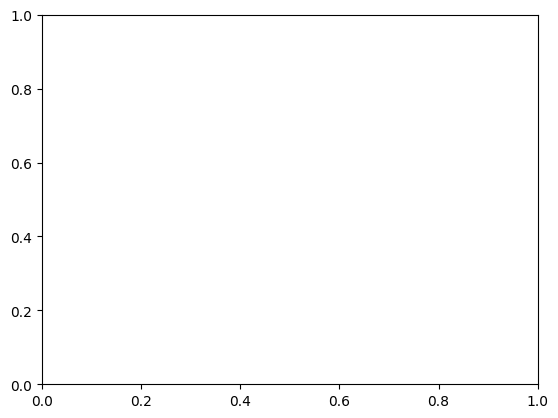

In [15]:
plt.plot(df['date'],df['afinn_sentiment'])